In [1]:
import pybullet as p
import time
import pybullet_data

sim_freq = 300
physicsClient = p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())  # optionally
p.setGravity(0, 0, -9.81)
p.setTimeStep(1.0/sim_freq)
p.setRealTimeSimulation(0)
planeId = p.loadURDF("plane.urdf")
startPos = [0, 0, 0.5]
startOrientation = p.getQuaternionFromEuler([0, 0, 0])
robot = p.loadURDF("urdf/quadrobot.urdf", startPos, startOrientation, useFixedBase=False,
                        flags=p.URDF_USE_INERTIA_FROM_FILE)#+p.URDF_USE_SELF_COLLISION+p.URDF_USE_SELF_COLLISION_EXCLUDE_ALL_PARENTS)

pybullet build time: Dec  1 2021 18:33:43


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce GTX 1050 with Max-Q Design/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 470.103.01
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 470.103.01
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce GTX 1050 with Max-Q Design/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = NVIDIA Corporation
ven = NVIDIA Corporation


In [2]:
from math import *
import matplotlib.pyplot as plt
from scipy.integrate import ode

# gait parameters
A = 1.0 # amplitude
beta = 0.5 # duty factor
w_sw = 2*pi # swing phase frequency
phi = [0]*4
phi_walk   = [pi, 0, 0.5*pi, 1.5*pi] # walk gait
phi_trot   = [pi, 0, 0, pi] # trot gait
phi_pace   = [pi, 0, pi, 0] # pace gait
phi_gallop = [0, 0, pi, pi] # gallop gait

# equation parameters
alpha = 0.25 # convergence rate
sim_freq = 300
dt = 1/sim_freq # direiative time
lamb = 1
a = 100

# initial parameters
x1_0 = 0.0#-pi/125
y1_0 = 0.0#-pi/4
x2_0 = 0.01#-pi/150
y2_0 = 0.01#-pi/4
x3_0 = 0.01#-pi/150
y3_0 = 0.01#-pi/4
x4_0 = 0.01#-pi/150
y4_0 = 0.01#-pi/4
t0 = 0.0

YLIM = (-5, 5)

mu = sqrt(A)

P_RF = [0]*3

In [3]:
r = [0]*4
w = [0]*4
sum_con = [[0,0],[0,0],[0,0],[0,0]]
x = [0]*4
y = [0]*4

def cpg(t, xy):
    x[0], y[0], x[1], y[1], x[2], y[2], x[3], y[3] = xy

    for i in range(4):
        r[i] = sqrt(x[i]**2 + y[i]**2)
        w[i] = w_sw*((beta/(exp(-a*y[i])+1)) + (1/(exp(a*y[i])+1)))
        sum_con[i][0] = 0
        sum_con[i][1] = 0
        for j in range(4):
            sum_con[i][0] += lamb*(cos(phi[i]-phi[j])*x[j] - sin(phi[i]-phi[j])*y[j])
            sum_con[i][1] += lamb*(sin(phi[i]-phi[j])*x[j] + cos(phi[i]-phi[j])*y[j])

    # # leg1 
    # r[0] = sqrt(x[0]**2 + y[0]**2)
    # w[0] = w_sw*((beta/(exp(-a*y[0])+1)) + (1/(exp(a*y[0])+1)))
    # sum_con[0][0] = 0
    # sum_con[0][1] = 0
    # for j in range(4):
    #     sum_con[0][0] += lamb*(cos(phi[0]-phi[j])*x[j] - sin(phi[0]-phi[j])*y[j])
    #     sum_con[0][1] += lamb*(sin(phi[0]-phi[j])*x[j] + cos(phi[0]-phi[j])*y[j])
    
    # # leg2
    # r[1] = sqrt(x[1]**2 + y[1]**2)
    # w[1] = w_sw*((beta/(exp(-a*y[1])+1)) + (1/(exp(a*y[1])+1)))
    # sum_con[1][0] = 0
    # sum_con[1][1] = 0
    # for j in range(4):
    #     sum_con[1][0] += (lamb*(cos(phi[1]-phi[j])*x[j] - sin(phi[1]-phi[j])*y[j]))
    #     sum_con[1][1] += (lamb*(sin(phi[1]-phi[j])*x[j] + cos(phi[1]-phi[j])*y[j]))

    # # leg3
    # r[2] = sqrt(x[2]**2 + y[2]**2)
    # w[2] = w_sw*((beta/(exp(-a*y[2])+1)) + (1/(exp(a*y[2])+1)))
    # sum_con[2][0] = 0
    # sum_con[2][1] = 0
    # for j in range(4):
    #     sum_con[2][0] += lamb*(cos(phi[2]-phi[j])*x[j] - sin(phi[2]-phi[j])*y[j])
    #     sum_con[2][1] += lamb*(sin(phi[2]-phi[j])*x[j] + cos(phi[2]-phi[j])*y[j])

    # # leg4
    # r[3] = sqrt(x[3]**2 + y[3]**2)
    # w[3] = w_sw*((beta/(exp(-a*y[3])+1)) + (1/(exp(a*y[3])+1)))
    # sum_con[3][0] = 0
    # sum_con[3][1] = 0
    # for j in range(4):
    #     sum_con[3][0] += lamb*(cos(phi[3]-phi[j])*x[j] - sin(phi[3]-phi[j])*y[j])
    #     sum_con[3][1] += lamb*(sin(phi[3]-phi[j])*x[j] + cos(phi[3]-phi[j])*y[j])
    
    return [alpha*(mu-r[0]**2)*x[0]-w[0]*y[0]+sum_con[0][0], alpha*(mu-r[0]**2)*y[0]+w[0]*x[0]+sum_con[0][1],
            alpha*(mu-r[1]**2)*x[1]-w[1]*y[1]+sum_con[1][0], alpha*(mu-r[1]**2)*y[1]+w[1]*x[1]+sum_con[1][1],
            alpha*(mu-r[2]**2)*x[2]-w[2]*y[2]+sum_con[2][0], alpha*(mu-r[2]**2)*y[2]+w[2]*x[2]+sum_con[2][1],
            alpha*(mu-r[3]**2)*x[3]-w[3]*y[3]+sum_con[3][0], alpha*(mu-r[3]**2)*y[3]+w[3]*x[3]+sum_con[3][1]]


In [4]:
# initial foot coordinates
P_B3 = {1: {"x": 0.3063, "y": -0.1835, "z": -0.3450},
        2: {"x": 0.3063, "y": 0.1835, "z": -0.3450},
        3: {"x": -0.2568, "y": -0.1835, "z": -0.3450},
        4: {"x": -0.2568, "y": 0.1835, "z": -0.3450},
        }

In [5]:
from locomotion_control_level.body_moving import Body_Moving

Hg = 0.08
Ls = 0.1

b_mov = Body_Moving()

ef_ref_pos_tmp = {1: {"x": 0.3063, "y": -0.1835, "z": -0.3450},
                2: {"x": 0.3063, "y": 0.1835, "z": -0.3450},
                3: {"x": -0.2568, "y": -0.1835, "z": -0.3450},
                4: {"x": -0.2568, "y": 0.1835, "z": -0.3450},
                }
# rot_dir:
#       1 - CW
#       0 - CCW
#       -1 - not rotation
def map_function(phi, leg_number=1, dir=0, rot_dir=1, r=0):
    k_y = 0.025
    # map ef parameters
    if -pi <= phi < 0:
        Px = -((1/pi)*Ls*phi + Ls/2)# + P_B3[leg_number]["x"]
        Pz = P_B3[leg_number]["z"]
        #Py = 0
    elif 0 <= phi <= pi:
        Px = -((1/(2*pi))*Ls*sin(2*phi) - (1/pi)*Ls*phi + Ls/2)# + P_B3[leg_number]["x"]
        if 0 <= phi < pi/2:
            Pz = (-1/(2*pi))*Hg*sin(4*phi) + (2/pi)*Hg*phi + P_B3[leg_number]["z"]
        else:
            Pz = (1/(2*pi))*Hg*sin(4*phi) - (2/pi)*Hg*phi + 2*Hg + P_B3[leg_number]["z"]
        # if leg_number == 1 or leg_number == 3:
        #     Py = k_y*sin(phi)
        # else:
        #     Py = -k_y*sin(phi)
    Py = 0#P_B3[leg_number]["y"]

    # change Y direction
    Px_new = Px*cos(dir) - Py*sin(dir)
    Py_new = Px*sin(dir) + Py*cos(dir)
    Px = Px_new
    Py = Py_new

    # Z turning
    if rot_dir != -1:
        if leg_number == 1 or leg_number == 2:
            sign = 1
        else:
            sign = -1

        if rot_dir == 1:
            alpha = -atan2(0.5631, 2*r-0.367)
            beta = -atan2(0.5631, 2*r+0.367)
        else:
            alpha = atan2(0.5631, 2*r+0.367)
            beta = atan2(0.5631, 2*r-0.367)

        if leg_number == 1 or leg_number == 3:
            turn = alpha
        else:
            turn = beta
            
        Px_new = Px*cos(sign*turn) - Py*sin(sign*turn)
        Py_new = Px*sin(sign*turn) + Py*cos(sign*turn)
        Px = Px_new
        Py = Py_new

    # add offset from CoG to endeffector
    Px = Px + P_B3[leg_number]["x"]
    Py = Py + P_B3[leg_number]["y"]

    #return [P_B3[leg_number]["x"], P_B3[leg_number]["y"], P_B3[leg_number]["z"]]
    return [Px, Py, Pz]

def zmp_stabilize(phi, px_cur, py_cur, px_zmp, py_zmp, body_x, body_y):
    # ZMP optimization
    if -pi <= phi < 0:
        px_ref = 0
        py_ref = 0
        
        ex = px_zmp - body_x
        ux = 0.01*ex
        px_ref = px_cur - ux

        ey = py_zmp - body_y
        uy = 0.01*ey
        py_ref = py_cur - uy
    return px_ref, py_ref

def stabilize_body(robot, euler, cur_ef_pos, k1, k2):
    roll = euler[0]
    yaw = euler[2]

    #k1 = 0.15
    #k2 = 0.13

    return b_mov.move([-k1*yaw, k2*roll, 0], [0,0,0], cur_ef_pos)


In [6]:
class SignalGenerator(object):
    def __init__(self):
        pass

    # type:
    #   horiz
    #   lin
    #   sin
    def set_params(self, data=[[2,0], [4,2], [1,4]], type='horiz', dt=0.01):
        self.data = data
        self.type = type
        self.cur_pt = 0
        self.out = 0

        if type == 'lin':
            if data[0][1] != 0:
                data.insert(0, [0,0])
            if data[0][1] == 0:
                self.out = self.data[0][0]
            else:
                self.out = 0
        elif type == 'sin':
            self.A = data[0]
            self.w = data[1]
            self.phi = data[2]
            self.bias = data[3]
        self.inc = 0
        self.dt = dt


    def step(self, i):
        
        if self.type == 'horiz':
            self.out = self.__step_horiz(i)
        elif self.type == 'lin':
            self.out = self.__step_lin(i)
        elif self.type == 'sin':
            self.out = self.__step_sin(i)
        return self.out

    def __step_horiz(self, i):
        if i < self.data[0][1]:
            return 0

        if self.cur_pt < (len(self.data)-1):
            if i < self.data[self.cur_pt+1][1]:
                return self.data[self.cur_pt][0]
            else:
                self.cur_pt += 1
                return self.data[self.cur_pt][0]
        else:
            return self.data[self.cur_pt][0]

    def __step_lin(self, i):
        if i == 0:
            return self.out
        
        elif self.cur_pt < (len(self.data)-1):
            if i > self.data[self.cur_pt+1][1]:
                self.cur_pt += 1
            if self.cur_pt >= (len(self.data)-1):
                self.inc = 0
            else:
                dt_int = (self.data[self.cur_pt+1][1] - self.data[self.cur_pt][1])/self.dt
                if dt_int != 0:
                    self.inc = (self.data[self.cur_pt+1][0] - self.data[self.cur_pt][0])/(dt_int)
                else:
                    self.inc = 0
        else:
            self.inc = 0
        
        self.out += self.inc
        return self.out

    def __step_sin(self, i):
        self.out = self.A*sin(self.w*i + self.phi) + self.bias
        return self.out

In [7]:
import time

cur_gen = SignalGenerator()
cur_gen.set_params(data=[1, 4, 1, 2], type='sin', dt=0.01)

lst = [[], []]
for i in range(600):
    lst[1].append(cur_gen.step(i/100))
    lst[0].append(i/100)
    #print(cur_gen.step(i/10))

In [8]:
import time

cur_gen = SignalGenerator()
cur_gen.set_params(data=[[0,1], [4,3], [4,4], [5,5.5], [5,7], [0,8]], type='lin', dt=0.1)

lst = [[], []]
for i in range(100):
    lst[1].append(cur_gen.step(i/10))
    lst[0].append(i/10)
    #print(cur_gen.step(i/10))

    

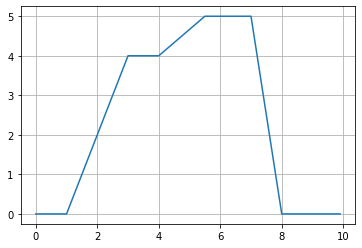

In [9]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(lst[0], lst[1])
plt.grid()
plt.show()

In [10]:

jointIds = []
for j in range(p.getNumJoints(robot)):
    p.changeDynamics(robot, j, linearDamping=0, angularDamping=0)
    info = p.getJointInfo(robot, j)
    # print(info)
    #jointName = info[1]
    jointType = info[2]
    if (jointType == p.JOINT_REVOLUTE):
        jointIds.append(j)

joint_dir = [-1]*16
# joint_offset = [0, -1.57, 0, 0, 1.57, 0, 0, 1.57, 0, 0, -1.57, 0]
joint_offset = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
from math import *
def from_dir_to_angle(dir):
    return atan2(dir[1], dir[0])

from_dir_to_angle([1,1])

lst = [1,2,3,4,5]
lst[0:2]

[1, 2]

In [12]:
%matplotlib qt
import time
import matplotlib.pyplot as plt
from locomotion_control_level.ikine import IKine
sol1 = [[t0], [x1_0], [y1_0], [atan2(y1_0, x1_0)]]
sol2 = [[t0], [x2_0], [y2_0], [atan2(y2_0, x2_0)]]
sol3 = [[t0], [x3_0], [y3_0], [atan2(y3_0, x3_0)]]
sol4 = [[t0], [x3_0], [y3_0], [atan2(y3_0, x3_0)]]
de = ode(cpg)
de.set_integrator('dopri5')
de.set_initial_value([x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, x4_0, y4_0], t0)

phi = phi_walk
w_sw = 1*pi
beta = 1.1
a = 100
lamb = 8
alpha = 100
mu = 1                
it = 0

p_rf_sol = [[], [], [], []]
p_lf_sol = [[], [], [], []]
p_rh_sol = [[], [], [], []]
p_lh_sol = [[], [], [], []]
euler_sol = [[], [], []]
pos_sol = [[], [], []]
zmp_sol = [[], []]

theta_ref_pos = [0]*12
ef_ref_pos = {1: {"x": 0.0, "y": 0.0, "z": 0.0},
                2: {"x": 0.0, "y": 0.0, "z": 0.0},
                3: {"x": 0.0, "y": 0.0, "z": 0.0},
                4: {"x": 0.0, "y": 0.0, "z": 0.0},
                }

ik = IKine()

step_period = 1.0/sim_freq
x_offset = 0.084

k1 = 0.15
k2 = 0

x_prev = 0
dx_prev = 0
y_prev = 0
dy_prev = 0

# variables for footprints
R1_footprint = [[], []]
R2_footprint = [[], []]
L1_footprint = [[], []]
L2_footprint = [[], []]

XLIM = (-0.2, 5)
while de.successful() and de.t <= XLIM[1]:
        start_time = time.time()

        if it <= XLIM[1]/4:
                w_sw = 3*pi
                delta = 0
                rot_dir = -1
                rot_r = 1.0
                phi = phi_trot
        elif XLIM[1]/4 < it <= XLIM[1]/2:
                w_sw = 3*pi
                #delta = 2.8
        elif XLIM[1]/2 < it <= 0.75*XLIM[1]:
                w_sw = 3*pi
                #rot_dir = -1
                #delta = -0.8
                #phi = phi_trot
        elif 0.75*XLIM[1] < it <= XLIM[1]:
                w_sw = 3*pi
                #delta = 0.0
                #delta = 0.0

        it += dt
        de.integrate(de.t + dt)

        phi_out1 = atan2(de.y[1], de.y[0])
        phi_out2 = atan2(de.y[3], de.y[2])
        phi_out3 = atan2(de.y[5], de.y[4])
        phi_out4 = atan2(de.y[7], de.y[6])

        P_RF = map_function(phi_out1, 1, delta, rot_dir, rot_r)
        P_LF = map_function(phi_out2, 2, delta, rot_dir, rot_r)
        P_RH = map_function(phi_out3, 3, delta, rot_dir, rot_r)
        P_LH = map_function(phi_out4, 4, delta, rot_dir, rot_r)

        cubePos, cubeOrn = p.getBasePositionAndOrientation(robot)
        euler = p.getEulerFromQuaternion(cubeOrn)

        ef_ref_pos[1]["x"] = P_RF[0]#-x_offset
        ef_ref_pos[1]["y"] = P_RF[1]
        ef_ref_pos[1]["z"] = P_RF[2]
        ef_ref_pos[2]["x"] = P_LF[0]#-x_offset
        ef_ref_pos[2]["y"] = P_LF[1]
        ef_ref_pos[2]["z"] = P_LF[2]
        ef_ref_pos[3]["x"] = P_RH[0]#-x_offset
        ef_ref_pos[3]["y"] = P_RH[1]
        ef_ref_pos[3]["z"] = P_RH[2]
        ef_ref_pos[4]["x"] = P_LH[0]#-x_offset
        ef_ref_pos[4]["y"] = P_LH[1]
        ef_ref_pos[4]["z"] = P_LH[2]

        # -- save footprints ---
        if -pi < phi_out1 < 0:
                R1_footprint[0].append(1)
                R1_footprint[1].append(it)

        if -pi < phi_out2 < 0:
                R2_footprint[0].append(2)
                R2_footprint[1].append(it)

        if -pi < phi_out3 < 0:
                L1_footprint[0].append(1.5)
                L1_footprint[1].append(it)

        if -pi < phi_out4 < 0:
                L2_footprint[0].append(2.5)
                L2_footprint[1].append(it)

        # --- ZMP ----
        zmp_x = cubePos[0]
        zmp_y = cubePos[1]

        dx = (x_prev - zmp_x)/dt
        ddx = (dx_prev - dx)/dt
        dy = (y_prev - zmp_y)/dt
        ddy = (dy_prev - dy)/dt

        zmp_px = zmp_x - (0.345/9.81)*ddx
        zmp_py = zmp_y - (0.345/9.81)*ddy
       
        x_prev = zmp_x
        dx_prev = dx
     
        y_prev = zmp_y
        dy_prev = dy
        
        # zmp optimization
        # ux = 0.06*(zmp_px - cubePos[0])
        # uy = 0.06*(zmp_py - cubePos[1])
        # inc = -0.0032
        # if -pi <= phi_out1 < 0:
        #         if zmp_px <= cubePos[0]:
        #                 ef_ref_pos[1]["x"] += inc
        #         else:
        #                 ef_ref_pos[1]["x"] -= inc
        #         if zmp_py <= cubePos[1]:
        #                 ef_ref_pos[1]["y"] += inc
        #         else:
        #                 ef_ref_pos[1]["y"] -= inc
        # if -pi <= phi_out2 < 0:
        #         if zmp_px <= cubePos[0]:
        #                 ef_ref_pos[2]["x"] += inc
        #         else:
        #                 ef_ref_pos[2]["x"] -= inc
        #         if zmp_py <= cubePos[1]:
        #                 ef_ref_pos[2]["y"] += inc
        #         else:
        #                 ef_ref_pos[2]["y"] -= inc
        # if -pi <= phi_out3 < 0:
        #         if zmp_px <= cubePos[0]:
        #                 ef_ref_pos[3]["x"] += inc
        #         else:
        #                 ef_ref_pos[3]["x"] -= inc
        #         if zmp_py <= cubePos[1]:
        #                 ef_ref_pos[3]["y"] += inc
        #         else:
        #                 ef_ref_pos[3]["y"] -= inc
        # if -pi <= phi_out4 < 0:
        #         if zmp_px <= cubePos[0]:
        #                 ef_ref_pos[4]["x"] += inc
        #         else:
        #                 ef_ref_pos[4]["x"] -= inc
        #         if zmp_py <= cubePos[1]:
        #                 ef_ref_pos[4]["y"] += inc
        #         else:
        #                 ef_ref_pos[4]["y"] -= inc

        zmp_sol[0].append(zmp_px)
        zmp_sol[1].append(zmp_py)
        # ------------

        # if k2 < 0.16:
        #         k2 += 0.00003

        # ef_ref_stab = stabilize_body(robot, euler, ef_ref_pos, k1, k2)

        #if -pi <= phi_out1 < 0:
        #ef_ref_pos = b_mov.move([0]*3, [0,0,0.3], ef_ref_pos)

        theta_ref_pos = ik.calculate(ef_ref_pos, config="m")#ef_ref_stab)#

        for i in range(len(jointIds)):
            p.setJointMotorControl2(robot, jointIds[i], p.POSITION_CONTROL,
                                    targetPosition=joint_dir[i]*theta_ref_pos[i]-joint_offset[i],
                                    maxVelocity=15.0)#
        p.stepSimulation()

        p_rf_sol[0].append(ef_ref_pos[1]["x"])
        p_rf_sol[1].append(ef_ref_pos[1]["y"])
        p_rf_sol[2].append(ef_ref_pos[1]["z"])
        p_rf_sol[3].append(de.t)

        p_lf_sol[0].append(ef_ref_pos[2]["x"])
        p_lf_sol[1].append(ef_ref_pos[2]["y"])
        p_lf_sol[2].append(ef_ref_pos[2]["z"])
        p_lf_sol[3].append(de.t)

        p_rh_sol[0].append(ef_ref_pos[3]["x"])
        p_rh_sol[1].append(ef_ref_pos[3]["y"])
        p_rh_sol[2].append(ef_ref_pos[3]["z"])
        p_rh_sol[3].append(de.t)

        p_lh_sol[0].append(ef_ref_pos[4]["x"])
        p_lh_sol[1].append(ef_ref_pos[4]["y"])
        p_lh_sol[2].append(ef_ref_pos[4]["z"])
        p_lh_sol[3].append(de.t)

        sol1[0].append(de.t)
        sol1[1].append(de.y[0])
        sol1[2].append(de.y[1])
        sol1[3].append(phi_out1)

        sol2[0].append(de.t)
        sol2[1].append(de.y[2])
        sol2[2].append(de.y[3])
        sol2[3].append(phi_out2)

        sol3[0].append(de.t)
        sol3[1].append(de.y[4])
        sol3[2].append(de.y[5])
        sol3[3].append(phi_out3)

        sol4[0].append(de.t)
        sol4[1].append(de.y[6])
        sol4[2].append(de.y[7])
        sol4[3].append(phi_out4)

        euler_sol[0].append(euler[0])
        euler_sol[1].append(euler[1])
        euler_sol[2].append(euler[2])

        pos_sol[0].append(cubePos[0])
        pos_sol[1].append(cubePos[1])
        pos_sol[2].append(cubePos[2])

        
        
        #plt.cla()
        # plt.xlim([0.2, 0.4])
        # plt.ylim([-0.4, -0.2])
        # plt.plot(P_RF[0], P_RF[2], 'r.')
        # plt.plot(P_LF[0], P_LF[2], 'b.')
        # plt.plot(P_RH[0], P_RH[2], 'r.')
        # plt.plot(P_LH[0], P_LH[2], 'b.')
        # plt.pause(1.0/sim_freq)


        elapced_time = time.time() - start_time
        wait_time = step_period - elapced_time
        # if wait_time > 0:
        #     time.sleep(wait_time)

plt.show()

In [20]:
%matplotlib qt

fig, ax = plt.subplots()
ax.set_yticks([1, 1.5, 2, 2.5], labels=['R1', 'L1', 'R2', 'L2'])
def on_draw(event):
    bboxes = []
    for label in ax.get_yticklabels():
        # Bounding box in pixels
        bbox_px = label.get_window_extent()
        # Transform to relative figure coordinates. This is the inverse of
        # transFigure.
        bbox_fig = bbox_px.transformed(fig.transFigure.inverted())
        bboxes.append(bbox_fig)
    # the bbox that bounds all the bboxes, again in relative figure coords
    bbox = mtransforms.Bbox.union(bboxes)
    if fig.subplotpars.left < bbox.width:
        # Move the subplot left edge more to the right
        fig.subplots_adjust(left=1.1*bbox.width)  # pad a little
        fig.canvas.draw()


fig.canvas.mpl_connect('draw_event', on_draw)

plt.grid()
plt.plot(R1_footprint[1], R1_footprint[0], 'bo')
plt.plot(L1_footprint[1], L1_footprint[0], 'bo')
plt.plot(R2_footprint[1], R2_footprint[0], 'bo')
plt.plot(L2_footprint[1], L2_footprint[0], 'bo')
plt.ylim(-4, 8)



(-4.0, 8.0)

Traceback (most recent call last):
  File "/home/yoggi/Quadruped/quadruped_control/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/tmp/ipykernel_22777/3683683480.py", line 15, in on_draw
    bbox = mtransforms.Bbox.union(bboxes)
NameError: name 'mtransforms' is not defined
Traceback (most recent call last):
  File "/home/yoggi/Quadruped/quadruped_control/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/tmp/ipykernel_22777/3683683480.py", line 15, in on_draw
    bbox = mtransforms.Bbox.union(bboxes)
NameError: name 'mtransforms' is not defined
Traceback (most recent call last):
  File "/home/yoggi/Quadruped/quadruped_control/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/tmp/ipykernel_22777/3683683480.py", line 15, in on_draw
    bbox = mtransforms.Bbox.union(bboxes)
NameErr

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

Traceback (most recent call last):
  File "/home/yoggi/Quadruped/quadruped_control/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/tmp/ipykernel_22777/3683683480.py", line 15, in on_draw
    bbox = mtransforms.Bbox.union(bboxes)
NameError: name 'mtransforms' is not defined


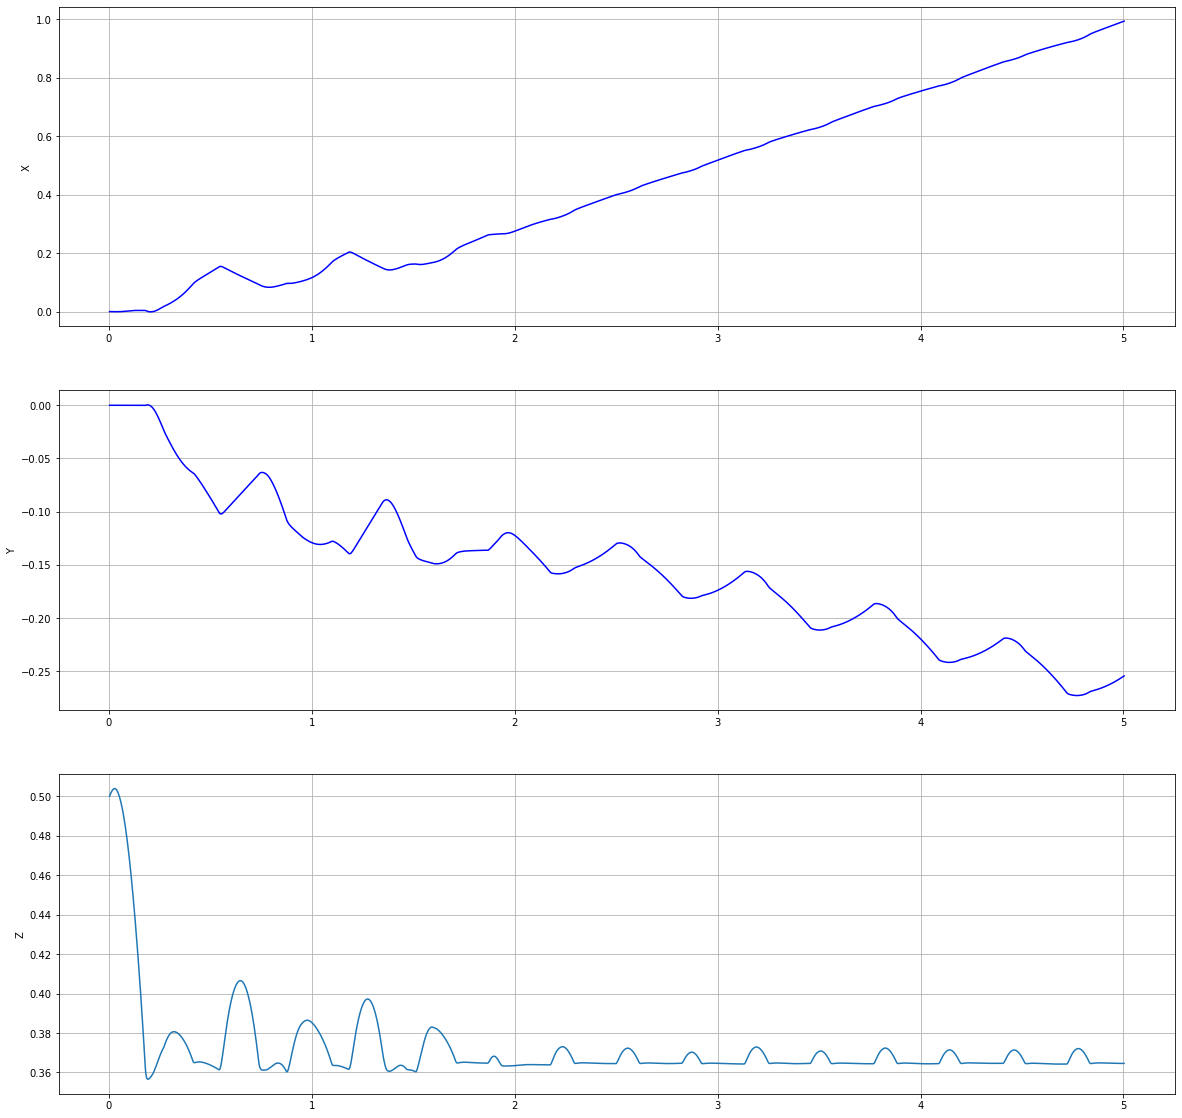

In [15]:
fig = plt.figure(figsize=(20,20),
            facecolor='white')

plt.subplot(3, 1, 1)
plt.grid()
plt.plot(p_rf_sol[3], pos_sol[0], 'b')#, p_rf_sol[3], zmp_sol[0], 'r')
plt.ylabel("X")

plt.subplot(3, 1, 2)
plt.grid()
plt.plot(p_rf_sol[3], pos_sol[1], 'b')#, p_rf_sol[3], zmp_sol[1], 'r')
plt.ylabel("Y")

plt.subplot(3, 1, 3)
plt.grid()
plt.plot(p_rf_sol[3], pos_sol[2])
plt.ylabel("Z")

plt.show()

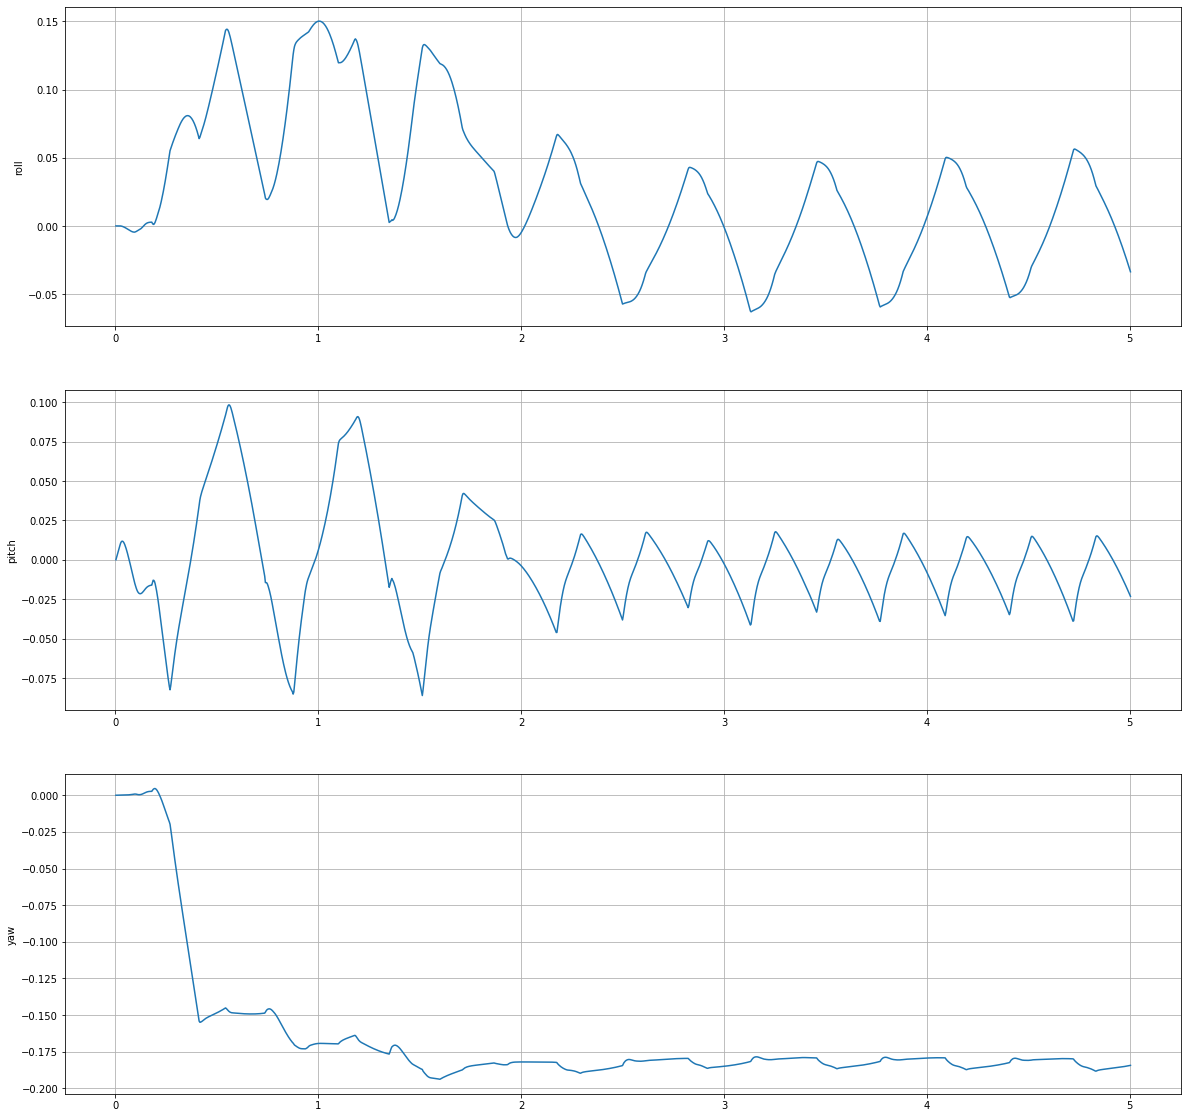

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(20,20),
            facecolor='white')

plt.subplot(3, 1, 1)
plt.grid()
plt.plot(p_rf_sol[3], euler_sol[0])
plt.ylabel("roll")

plt.subplot(3, 1, 2)
plt.grid()
plt.plot(p_rf_sol[3], euler_sol[1])
plt.ylabel("pitch")

plt.subplot(3, 1, 3)
plt.grid()
plt.plot(p_rf_sol[3], euler_sol[2])
plt.ylabel("yaw")

plt.show()

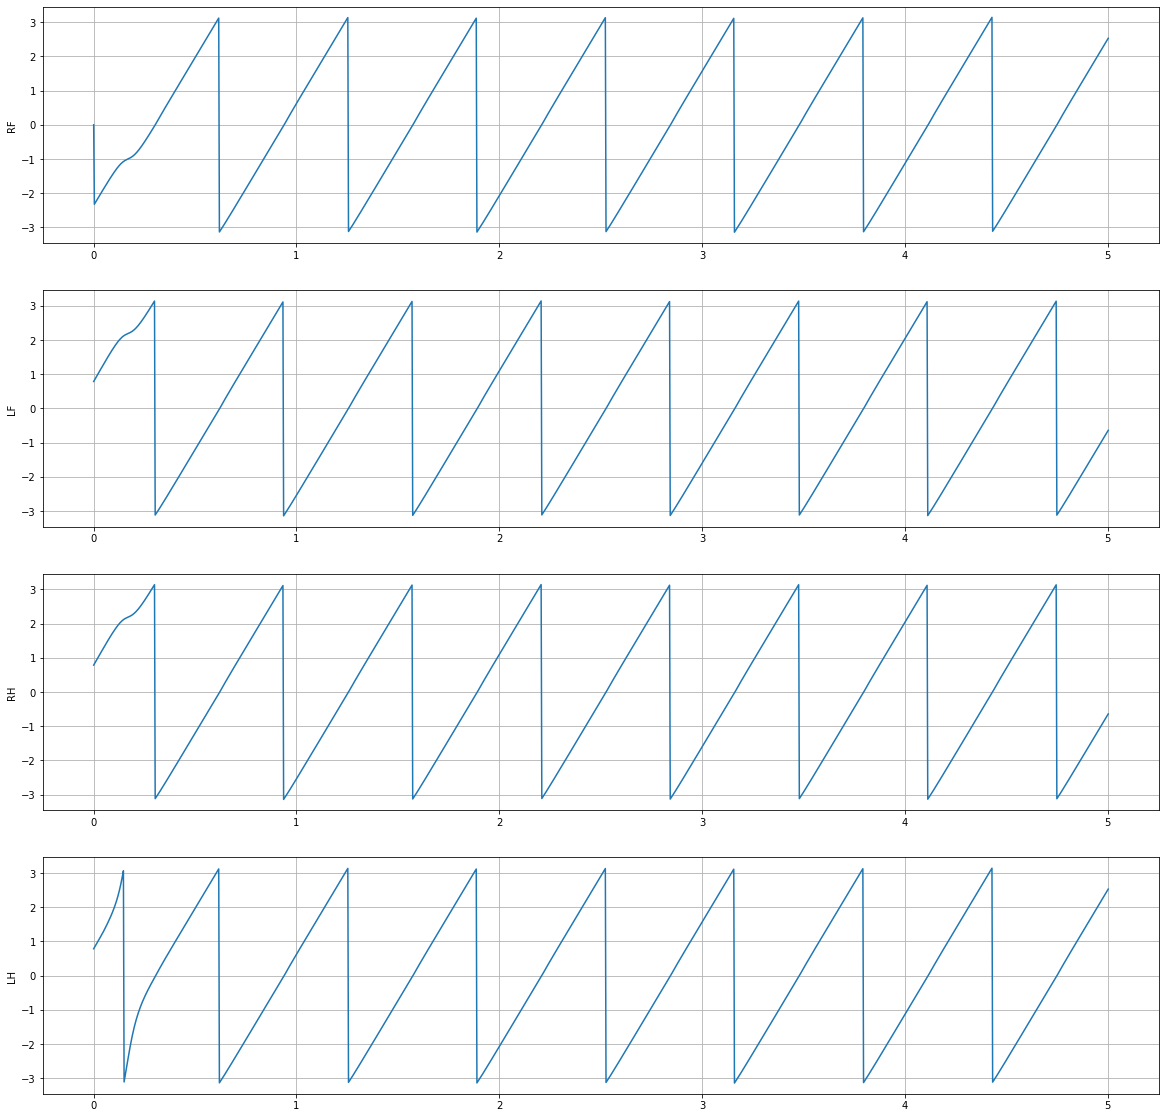

In [17]:

fig = plt.figure(figsize=(20,20),
            facecolor='white')

plt.subplot(4, 1, 1)
#plt.axes(xlim=XLIM, ylim=YLIM)
plt.grid()
plt.plot(sol1[0], sol1[3])
plt.ylabel("RF")
# plt.plot(XLIM[1]/4, 0, 'r.')
# plt.plot(XLIM[1]/2, 0, 'r.')
# plt.plot(3*XLIM[1]/4, 0, 'r.')
# plt.plot(XLIM[1], 0, 'r.')

plt.subplot(4, 1, 2)
#plt.axes(xlim=XLIM, ylim=YLIM)
plt.ylabel("LF")
plt.grid()
plt.plot(sol2[0], sol2[3])

plt.subplot(4, 1, 3)
#plt.axes(xlim=XLIM, ylim=YLIM)
plt.ylabel("RH")
plt.grid()
plt.plot(sol3[0], sol3[3])

plt.subplot(4, 1, 4)
#plt.axes(xlim=XLIM, ylim=YLIM)
plt.ylabel("LH")
plt.grid()
plt.plot(sol4[0], sol4[3])

#plt.show()

Text(0, 0.5, 'Pz')

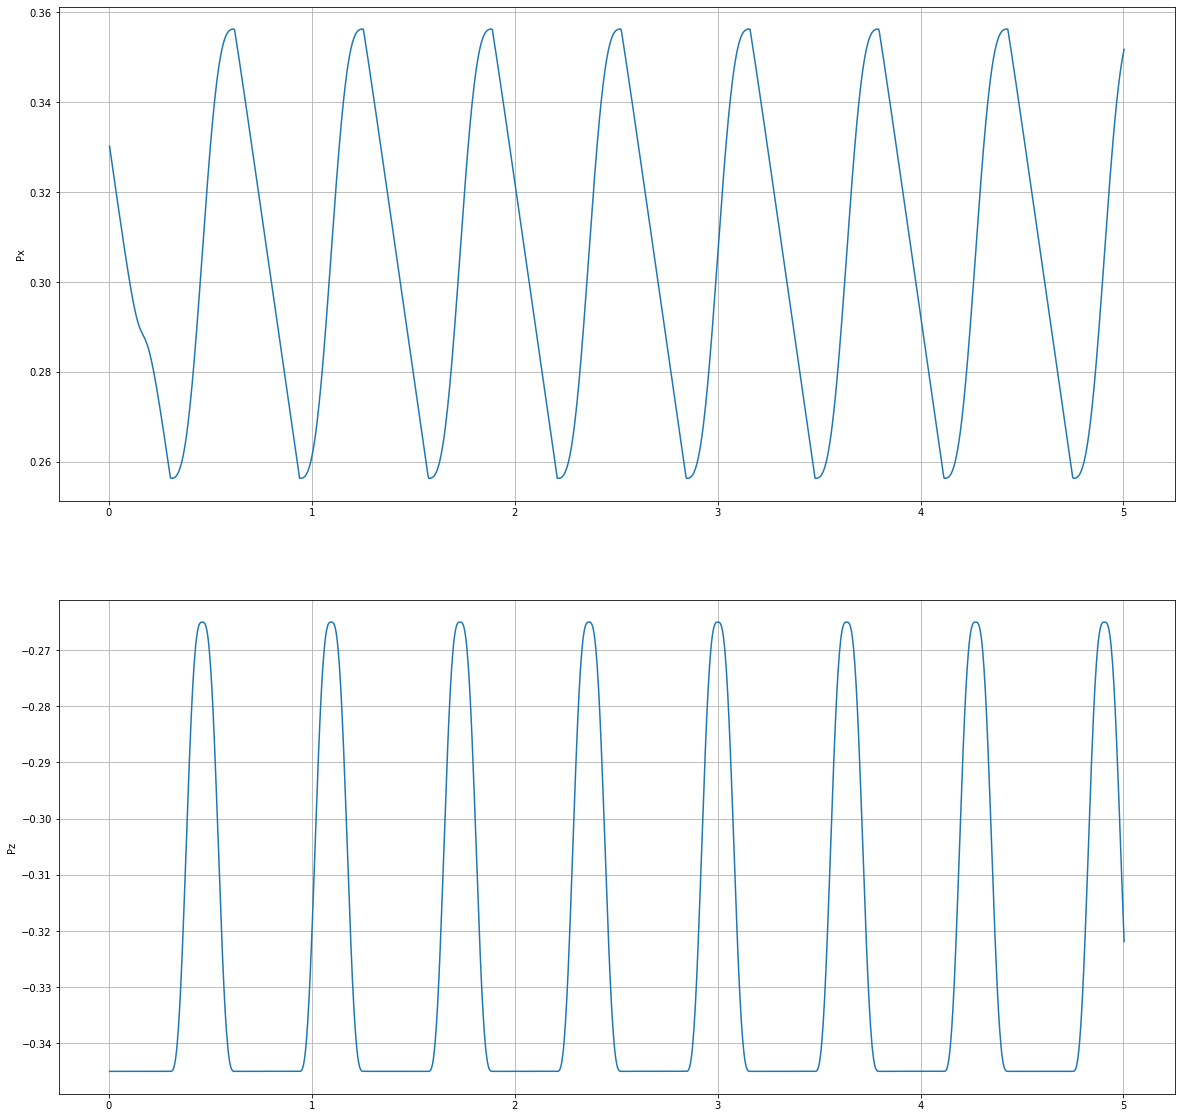

In [18]:
fig2 = plt.figure(figsize=(20,20),
            facecolor='white')

plt.subplot(2, 1, 1)
plt.plot(p_rf_sol[3], p_rf_sol[0])
plt.grid()
plt.ylabel("Px")


plt.subplot(2, 1, 2)
plt.grid()
plt.plot(p_rf_sol[3], p_rf_sol[2])
plt.ylabel("Pz")

#plt.show()

In [19]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
# fig3 = plt.figure(figsize=(20,20),
#             facecolor='white')

#plt.subplot(2, 1, 1)
#plt.axes(projection='3d')
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(p_rf_sol[0], p_rf_sol[1], p_rf_sol[2], label='RF')
ax.plot(p_lf_sol[0], p_lf_sol[1], p_lf_sol[2], label='LF')
ax.plot(p_rh_sol[0], p_rh_sol[1], p_rh_sol[2], label='RH')
ax.plot(p_lh_sol[0], p_lh_sol[1], p_lh_sol[2], label='LH')
ax.legend(loc='center')
ax.set_xlabel("X", fontsize=13)
ax.set_ylabel("Y", fontsize=13)
ax.set_zlabel("Z", fontsize=13)
ax.set_zlim(-0.345, 0)

# #plt.plot(p_rf_sol[0][1], p_rf_sol[1][1], p_rf_sol[2][1], 'r.')
# plt.grid()
# plt.ylabel("Py")
# plt.xlabel("Px")


plt.show()

/tmp/ipykernel_22777/2005896645.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
